In [3]:
# access the STAC API and build a search query
import pystac_client
import ipyleaflet

# read the data for analysis and visualization
import stackstac
import xarray as xr
import geopandas as gpd
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

# print figures within the jupyter notebook
%matplotlib inline

In [4]:
# access the PGC Data Catalog API
cat = pystac_client.Client.open("https://stac.pgc.umn.edu/api/v1/")
print("Catalog Title: {}".format(cat.title))

# view the components of the Catalog
cat

Catalog Title: PGC Data Catalog


<Client id=pgc-data-stac>

In [5]:
# see the available collections in the catalog
for collection in cat.get_collections():
    print(collection)

<CollectionClient id=rema-strips-s2s041-2m>
<CollectionClient id=arcticdem-mosaics-v4.1-2m>
<CollectionClient id=arcticdem-mosaics-v3.0-2m>
<CollectionClient id=arcticdem-mosaics-v3.0-32m>
<CollectionClient id=earthdem-strips-s2s041-2m>
<CollectionClient id=rema-mosaics-v2.0-2m>
<CollectionClient id=arcticdem-mosaics-v4.1-10m>
<CollectionClient id=rema-mosaics-v2.0-32m>
<CollectionClient id=arcticdem-strips-s2s041-2m>
<CollectionClient id=arcticdem-mosaics-v3.0-10m>
<CollectionClient id=rema-mosaics-v2.0-10m>
<CollectionClient id=arcticdem-mosaics-v4.1-32m>


In [6]:
# Filter the collections to view just the REMA datasets
collection_search = cat.collection_search(
    q="rema",
)

for result in collection_search.collections():
    print(result.id, f"{result.description}", sep="\n")
    print("\n")

rema-strips-s2s041-2m
REMA time-stamped strip DEMs, s2s version 4.1, 2m resolution


rema-mosaics-v2.0-2m
REMA DEM mosaics, version 2.0, 2m resolution


rema-mosaics-v2.0-32m
REMA DEM mosaics, version 2.0, 32m resolution


rema-mosaics-v2.0-10m
REMA DEM mosaics, version 2.0, 10m resolution




C:\Users\Ashley Howard\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pystac_client\collection_search.py:306: UserWarning: Server does not conform to COLLECTION_SEARCH. Filtering will be performed client-side where only bbox, datetime, and q arguments are supported
  warnings.warn(


In [7]:
# get the REMA strips collection
rema_strips_col = cat.get_collection("rema-strips-s2s041-2m")
rema_strips_col

<CollectionClient id=rema-strips-s2s041-2m>

In [8]:
# get the REMA 32m Mosaics collection metadata
rema_32m_mosaic_col = cat.get_collection("rema-mosaics-v2.0-32m")
rema_32m_mosaic_col

<CollectionClient id=rema-mosaics-v2.0-32m>

In [15]:
# zoom and pan to a location on the map to use for your bounding box
# TIP: running the query at the default zoom level of 7 on the map will return a LOT of records (which is fine since it is only metadata!)
# For a more manageable amount of data for manaul review, we suggest zooming in to a smaller area on the map
#bbox = (105.0, -78.5, 107.0, -76.5)
min_lon = -160
max_lon = -145
min_lat = -84
max_lat = -83

bbox = (min_lon, min_lat, max_lon, max_lat)
bbox

(-160, -84, -145, -83)

In [16]:
# build the API query for the items within out bounding box and date range
search = cat.search(
    collections = ["rema-strips-s2s041-2m"],
    bbox=bbox,
    datetime="2019-04-01/2025-04-01"
)

In [17]:
# fetch the items that fit our search parameters
items = list(search.items())
print(len(items))

634


In [18]:
items[4]

<Item id=SETSM_s2s041_WV03_20241228_10400100A0423B00_10400100A32BA300_2m_seg1>

In [19]:
items[4].properties

{'gsd': 2,
 'title': 'SETSM_s2s041_WV03_20241228_10400100A0423B00_10400100A32BA300_2m_seg1',
 'created': '2025-02-11T06:00:00Z',
 'license': 'CC-BY-4.0',
 'datetime': '2024-12-28T22:22:25Z',
 'pgc:rmse': 0.285217,
 'proj:bbox': [-499112.0, -722450.0, -424640.0, -622806.0],
 'proj:code': 'EPSG:3031',
 'published': '2025-04-14T00:00:00Z',
 'pgc:is_lsf': False,
 'proj:shape': [49822, 37236],
 'description': 'Digital surface models from photogrammetric elevation extraction using the SETSM algorithm.  The DEM strips are a time-stamped product suited to time-series analysis.',
 'instruments': ['WV03', 'WV03'],
 'pgc:geocell': 's83w146',
 'end_datetime': '2024-12-28T22:23:31Z',
 'pgc:pairname': 'WV03_20241228_10400100A0423B00_10400100A32BA300',
 'constellation': 'maxar',
 'pgc:image_ids': ['10400100A0423B00', '10400100A32BA300'],
 'pgc:is_xtrack': False,
 'proj:centroid': {'lat': -82.5006597707582, 'lon': -145.52363532704214},
 'proj:geometry': {'type': 'Polygon',
  'coordinates': [[[-499112.

In [20]:
# load the items into a geopandas dataframe and look at the first five records
items_gdf = gpd.GeoDataFrame.from_features(search.item_collection().to_dict(), crs="epsg:4326").to_crs(3031)
items_gdf.head(5)

,geometry,gsd,title,created,license,datetime,pgc:rmse,proj:bbox,proj:code,published,pgc:is_lsf,proj:shape,description,instruments,pgc:geocell,end_datetime,pgc:pairname,constellation,pgc:image_ids,pgc:is_xtrack,proj:centroid,proj:geometry,pgc:stripdemid,proj:transform,start_datetime,pgc:s2s_version,pgc:avg_sun_elevs,pgc:setsm_version,pgc:cloud_area_sqkm,pgc:valid_area_sqkm,pgc:water_area_sqkm,pgc:cloud_area_percent,pgc:valid_area_percent,pgc:water_area_percent,pgc:avg_convergence_angle,pgc:masked_matchtag_density,pgc:valid_area_matchtag_density,pgc:avg_expected_height_accuracy
0,"MULTIPOLYGON (((-361844.028 -664922.045, -3184...",2.0,SETSM_s2s041_WV01_20241231_102001010911F600_10...,2025-02-11T06:00:00Z,CC-BY-4.0,2024-12-31T23:01:20Z,0.135893,"[-364348.0, -678802.0, -294580.0, -571972.0]",EPSG:3031,2025-04-14T00:00:00Z,False,"[53415, 34884]",Digital surface models from photogrammetric el...,"[WV01, WV01]",s84w153,2024-12-31T23:02:19Z,WV01_20241231_102001010911F600_1020010109B1EA00,maxar,"[102001010911F600, 1020010109B1EA00]",False,"{'lat': -83.5009687507503, 'lon': -152.2190122...","{'type': 'Polygon', 'coordinates': [[[-364348....",WV01_20241231_102001010911F600_1020010109B1EA0...,"[2.0, 0.0, -364348.0, 0.0, -2.0, -571972.0, 0....",2024-12-31T23:01:20Z,4.1,"[24.28, 24.253333]",SETSM 4.3.16,57.294832,2237.349884,0.033508,0.024969,0.975017,0.000015,46.374813,0.962229,0.986885,0.825450
1,"MULTIPOLYGON (((-422338.012 -747506.032, -3765...",2.0,SETSM_s2s041_WV01_20241229_1020010109AD0400_10...,2025-02-11T06:00:00Z,CC-BY-4.0,2024-12-30T01:19:29Z,0.137707,"[-428736.0, -768282.0, -357812.0, -662142.0]",EPSG:3031,2025-04-14T00:00:00Z,False,"[53070, 35462]",Digital surface models from photogrammetric el...,"[WV01, WV01]",s83w152,2024-12-30T01:20:25Z,WV01_20241229_1020010109AD0400_1020010109DD9D00,maxar,"[1020010109AD0400, 1020010109DD9D00]",False,"{'lat': -82.49821812746714, 'lon': -151.194901...","{'type': 'Polygon', 'coordinates': [[[-428736....",WV01_20241229_1020010109AD0400_1020010109DD9D0...,"[2.0, 0.0, -428736.0, 0.0, -2.0, -662142.0, 0....",2024-12-30T01:19:29Z,4.1,"[28.626667, 28.68]",SETSM 4.3.16,0.000000,2208.692320,0.000000,0.000000,1.000000,0.000000,44.249951,0.993623,0.993623,0.869483
2,"MULTIPOLYGON (((-364546.011 -669904.01, -36453...",2.0,SETSM_s2s041_WV01_20241229_1020010109037500_10...,2025-02-11T06:00:00Z,CC-BY-4.0,2024-12-29T23:46:06Z,0.142336,"[-364546.0, -678982.0, -295550.0, -572572.0]",EPSG:3031,2025-04-14T00:00:00Z,False,"[53205, 34498]",Digital surface models from photogrammetric el...,"[WV01, WV01]",s84w153,2024-12-29T23:47:01Z,WV01_20241229_1020010109037500_1020010109099A00,maxar,"[1020010109037500, 1020010109099A00]",False,"{'lat': -83.49530464301384, 'lon': -152.191889...","{'type': 'Polygon', 'coordinates': [[[-364546....",WV01_20241229_1020010109037500_1020010109099A0...,"[2.0, 0.0, -364546.0, 0.0, -2.0, -572572.0, 0....",2024-12-29T23:46:06Z,4.1,"[25.66, 25.666667]",SETSM 4.3.16,0.000000,2134.453952,0.000000,0.000000,1.000000,0.000000,43.248911,0.992246,0.992246,0.892174
3,"MULTIPOLYGON (((-491727.986 -702965.969, -4362...",2.0,SETSM_s2s041_WV03_20241229_10400100A08C1400_10...,2025-02-11T06:00:00Z,CC-BY-4.0,2024-12-29T19:25:11Z,0.141544,"[-499376.0, -723232.0, -424232.0, -623054.0]",EPSG:3031,2025-04-14T00:00:00Z,False,"[50089, 37572]",Digital surface models from photogrammetric el...,"[WV03, WV03]",s83w146,2024-12-29T19:26:25Z,WV03_20241229_10400100A08C1400_10400100A2AD4200,maxar,"[10400100A08C1400, 10400100A2AD4200]",False,"{'lat': -82.49714132815026, 'lon': -145.548262...","{'type': 'Polygon', 'coordinates': [[[-499376....",WV03_20241229_10400100A08C1400_10400100A2AD420...,"[2.0, 0.0, -499376.0, 0.0, -2.0, -623054.0, 0....",2024-12-29T19:25:11Z,4.1,"[18.809524, 18.747619]",SETSM 4.3.16,0.000000,1654.225230,0.000000,0.000000,1.000000,0.000000,47.529548,0.991066,0.991066,0.803265
4,"MULTIPOLYGON (((-424890.004 -630739.995, -4246...",2.0,SETSM_s2s041_WV03_20241228_10400100A0423B00_10...,2025-02-11T06:00

In [21]:
# query geodataframe based on DEM attributes - we want intrack DEM strips with less than 40% cloudy pixels
subset_items_gdf = items_gdf[(items_gdf['pgc:is_xtrack'] == False) & (items_gdf['pgc:cloud_area_percent'] < 0.5)]

print(len(subset_items_gdf))

559


In [22]:
# plot the footprints of the subset geodataframe

# x = subset_items_gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
subset_items_gdf.explore(tooltip=["pgc:pairname", "start_datetime", "pgc:cloud_area_percent","pgc:water_area_percent","pgc:valid_area_percent"])

In [23]:
# Build search query with the 32m Mosaic collection and bbox from above
mosaic_search = cat.search(
    collections = ["rema-mosaics-v2.0-32m"],
    bbox=bbox
)

# return the list of items 
mosaic_items = list(mosaic_search.items())
print(len(mosaic_items))

# convert items to geodataframe
mosaic_items_gdf = gpd.GeoDataFrame.from_features(mosaic_search.item_collection().to_dict(), crs="epsg:4326").to_crs(3031)
mosaic_items_gdf

8


,geometry,gsd,title,created,license,datetime,pgc:tile,proj:bbox,proj:code,published,proj:shape,description,end_datetime,constellation,pgc:data_perc,pgc:supertile,proj:centroid,proj:geometry,proj:transform,start_datetime,pgc:pairname_ids,pgc:num_components,pgc:release_version
0,"MULTIPOLYGON (((-400095.979 -699903.966, -2999...",32,23_27_32m_v2.0,2022-08-08T00:00:00Z,CC-BY-4.0,2011-11-14T00:00:00Z,23_27,"[-400096, -800096, -299904, -699904]",EPSG:3031,2022-10-19T00:00:00Z,"[3131, 3131]",Digital surface model mosaic from photogrammet...,2020-03-12T00:00:00Z,maxar,0.999840,23_27,"{'lat': -82.39335752439689, 'lon': -154.983106...","{'type': 'Polygon', 'coordinates': [[[-400096....","[32.0, 0.0, -400096.0, 0.0, -32.0, -699904.0, ...",2011-11-14T00:00:00Z,[W1W1_20111124_1020010017D3C800_1020010017E61A...,169,2.0
1,"MULTIPOLYGON (((-300095.97 -499903.957, -19990...",32,25_28_32m_v2.0,2022-08-08T00:00:00Z,CC-BY-4.0,2011-10-07T00:00:00Z,25_28,"[-300096, -600096, -199904, -499904]",EPSG:3031,2022-10-19T00:00:00Z,"[3131, 3131]",Digital surface model mosaic from photogrammet...,2020-03-10T00:00:00Z,maxar,1.000000,25_28,"{'lat': -84.4437707041629, 'lon': -155.5560452...","{'type': 'Polygon', 'coordinates': [[[-300096....","[32.0, 0.0, -300096.0, 0.0, -32.0, -499904.0, ...",2011-10-07T00:00:00Z,[W1W1_20111007_10200100165D2600_10200100166D42...,251,2.0
2,"MULTIPOLYGON (((-500095.978 -499903.975, -3999...",32,25_26_32m_v2.0,2022-08-08T00:00:00Z,CC-BY-4.0,2010-11-12T00:00:00Z,25_26,"[-500096, -600096, -399904, -499904]",EPSG:3031,2022-10-19T00:00:00Z,"[3131, 3131]",Digital surface model mosaic from photogrammet...,2020-02-06T00:00:00Z,maxar,0.999999,25_26,"{'lat': -83.46637457814802, 'lon': -140.710593...","{'type': 'Polygon', 'coordinates': [[[-500096....","[32.0, 0.0, -500096.0, 0.0, -32.0, -499904.0, ...",2010-11-12T00:00:00Z,[W1W1_20101112_102001000E4EDD00_10200100104CE1...,187,2.0
3,"MULTIPOLYGON (((-300096.027 -599904.046, -1999...",32,24_28_32m_v2.0,2022-08-08T00:00:00Z,CC-BY-4.0,2010-11-12T00:00:00Z,24_28,"[-300096, -700096, -199904, -599904]",EPSG:3031,2022-10-19T00:00:00Z,"[3131, 3131]",Digital surface model mosaic from photogrammet...,2020-02-26T00:00:00Z,maxar,0.999840,24_28,"{'lat': -83.59679669893757, 'lon': -158.962488...","{'type': 'Polygon', 'coordinates': [[[-300096....","[32.0, 0.0, -300096.0, 0.0, -32.0, -599904.0, ...",2010-11-12T00:00:00Z,[W1W1_20101112_10200100109F8D00_1020010010AE19...,232,2.0
4,"MULTIPOLYGON (((-400095.989 -499903.979, -2999...",32,25_27_32m_v2.0,2022-08-08T00:00:00Z,CC-BY-4.0,2010-11-04T00:00:00Z,25_27,"[-400096, -600096, -299904, -499904]",EPSG:3031,2022-10-19T00:00:00Z,"[3131, 3131]",Digital surface model mosaic from photogrammet...,2020-03-10T00:00:00Z,maxar,1.000000,25_27,"{'lat': -84.00520230331865, 'lon': -147.528807...","{'type': 'Polygon', 'coordinates': [[[-400096....","[32.0, 0.0, -400096.0, 0.0, -32.0, -499904.0, ...",2010-11-04T00:00:00Z,[W1W1_20101104_102001000F060300_1020010010B0B0...,205,2.0
5,"MULTIPOLYGON (((-400096.029 -599904.034, -2999...",32,24_27_32m_v2.0,2022-08-08T00:00:00Z,CC-BY-4.0,2010-11-04T00:00:00Z,24_27,"[-400096, -700096, -299904, -599904]",EPSG:3031,2022-10-19T00:00:00Z,"[3131, 3131]",Digital surface model mosaic from photogrammet...,2020-03-12T00:00:00Z,maxar,0.999999,24_27,"{'lat': -83.21310635904553, 'lon': -151.699244...","{'type': 'Polygon', 'coordinates': [[[-400096....","[32.0, 0.0, -400096.0, 0.0, -32.0, -599904.0, ...",2010-11-04T00:00:00Z,[W1W1_20101104_102001000F060300_1020010010B0B0...,192,2.0
6,"MULTIPOLYGON (((-500096.033 -599904.039, -3999...",32,24_26_32m_v2.0,2022-08-08T00:00:00Z,CC-BY-4.0,2010-10-30T00:00:00Z,24_26,"[-500096, -700096, -399904, -599904]",EPSG:3031,2022-10-19T00:00:00Z,"[3131, 3131]",Digital surface model mosaic from photogrammet...,2020-03-05T00:00:00Z,maxar,0.999999,24_26,"{'lat': -82.73323158919496, 'lon': -145.304846...","{'type': 'Polygon', 'coordinates': [[[-500096....","[32.0, 0.0, -500096.0, 0.0, -32.0, -599904.0, ...",2010-10-3

In [24]:
#visualize tile extents

mosaic_items_gdf.explore(tooltip=["pgc:tile"])

In [25]:
%%time

stack = stackstac.stack(items, epsg=3031, bounds_latlon=bbox)

stack

CPU times: total: 141 ms
Wall time: 117 ms


<xarray.DataArray 'stackstac-1798363a63884dc562ab2fcb2d73a6f3' (time: 634,
                                                                band: 5,
                                                                y: 90206,
                                                                x: 106649)> Size: 244TB
dask.array<fetch_raster_window, shape=(634, 5, 90206, 106649), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/41)
  * time                              (time) datetime64[ns] 5kB NaT ... 2024-...
    id                                (time) <U72 183kB 'SETSM_s2s041_W2W3_20...
    start_datetime                    (time) <U20 51kB '2023-01-18T19:05:06Z'...
    pgc:stripdemid                    (time) <U58 147kB 'W2W3_20230118_103001...
    pgc:setsm_version                 (time) <U12 30kB 'SETSM 4.3.14' ... 'SE...
    pgc:geocell                       (time) <U7 18kB 's84w152' ... 's84w153'
    ...                                ...
  * x                                 (x) float64 853kB -4.368e+05 ... -2.232...
    constellation                     <U5 20B 'maxar'
    pgc:s2s_version                   <U3 12B '4.1'
    description                       <U166 664B 'Digital surface models from...
    license                           <U9 36B 'CC-BY-4.0'
    epsg                              int64 8B 3031
Attributes:
    spec:           RasterSpec(epsg=3031, bounds=(-436765.2882940444, -715554...
    crs:            epsg:3031
    transform:      | 2.00, 0.00,-436765.29|\n| 0.00,-2.01,-534485.76|\n| 0.0...
    resolution_xy:  (2.002858189736574, 2.0072773274778704)

In [26]:
%%time

mosaic_stack = stackstac.stack(mosaic_items[0], epsg=3031)

mosaic_stack

CPU times: total: 15.6 ms
Wall time: 3.95 ms


<xarray.DataArray 'stackstac-fe3fb3ebc2f86fbd0779ebd70b0bd95f' (time: 1,
                                                                band: 6,
                                                                y: 3132, x: 3132)> Size: 471MB
dask.array<fetch_raster_window, shape=(1, 6, 3132, 3132), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                 (time) datetime64[ns] 8B 2011-11-14
    id                   (time) <U14 56B '23_27_32m_v2.0'
  * band                 (band) <U9 216B 'dem' 'mad' ... 'mindate' 'hillshade'
    title                (band) <U25 600B '32m DEM' ... 'Hillshade'
    unit                 (band) object 48B 'meter' 'meter' None None None None
    nodata               (band) int64 48B -9999 -9999 0 0 0 0
    ...                   ...
    proj:centroid        object 8B {'lat': -82.39335752439689, 'lon': -154.98...
    pgc:data_perc        float64 8B 0.9998
    pgc:release_version  <U3 12B '2.0'
    end_datetime         <U20 80B '2020-03-12T00:00:00Z'
    description          <U187 748B 'Digital surface model mosaic from photog...
    epsg                 int64 8B 3031
Attributes:
    spec:           RasterSpec(epsg=3031, bounds=(-443954.04984294163, -83767...
    crs:            epsg:3031
    transform:      | 56.43, 0.00,-443954.05|\n| 0.00,-56.40,-661036.15|\n| 0...
    resolution_xy:  (56.43244563911804, 56.397589673905266)

CPU times: total: 1.91 s
Wall time: 2.04 s


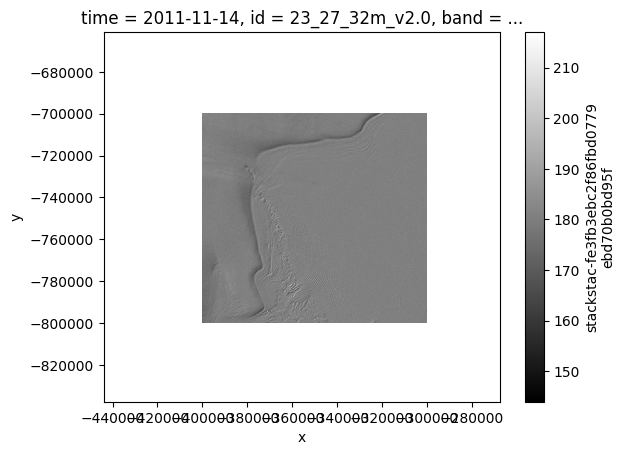

In [27]:
%%time

mosaic_stack.sel(band='hillshade').plot(cmap='gist_gray')

CPU times: total: 1.95 s
Wall time: 5.86 s


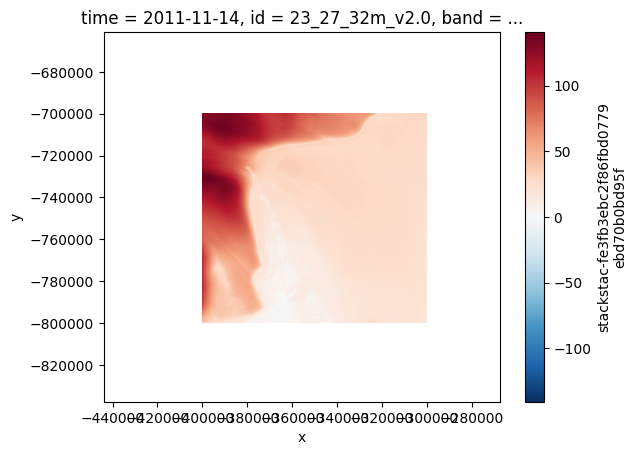

In [28]:
%%time

mosaic_stack.sel(band='dem').plot()